In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [2]:
#Input Data
df = pd.read_csv('Financial_Distress.csv')

In [3]:
#label 0 represents healthy and label 1 represents distressed.
df["Label"] = 1
df.loc[ (df['Financial Distress']> -0.5),'Label'] = 0
df.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,Label
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49,0
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50,0
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51,0
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52,1
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27,0


In [4]:
#Companies Statistics
total_n = len(df.groupby('Company')['Company'].nunique())
print("Total number of companies : ",total_n)

distress_companies = df[df['Financial Distress'] < -0.5]
u_distress = distress_companies['Company'].unique()
print("Distressed Companies : ",u_distress.shape[0])

Total number of companies :  422
Distressed Companies :  136


Text(0,0.5,'Frequency')

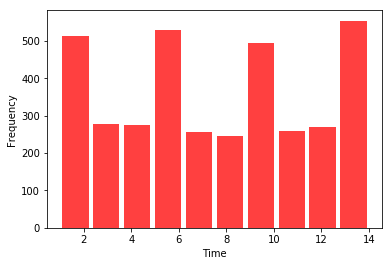

In [5]:
plt.hist(df['Time'],bins=10,color=['red'],rwidth=0.85,alpha=0.75)
plt.xlabel('Time')
plt.ylabel('Frequency')

In [51]:
#Splitting training and testing data
def split(dfr,time):
    X_train_set = df[df.Time <= time].drop(['Time','Company','x80'],axis=1)
    y_train_label = np.array(X_train_set['Label'])
    y_train_financial_distress = np.array(X_train_set['Financial Distress'])
    X_train = X_train_set.drop(['Financial Distress','Label'],axis=1)
    X_test_set = df[df.Time > time].drop(['Time','Company','x80'],axis=1)
    y_test_label = np.array(X_test_set['Label'])
    y_test_financial_distress = np.array(X_test_set['Financial Distress'])
    X_test = X_test_set.drop(['Financial Distress','Label'],axis=1)
    
    return X_train, y_train_label, y_train_financial_distress,X_test,y_test_label, y_test_financial_distress

X_train, y_train_label, y_train_financial_distress,X_test,y_test_label, y_test_financial_distress = split(df,10)
#X_train.head()
#y_train_label
#y_train_financial_distress
#X_test.head()
#y_test_label
#y_test_financial_distress

In [23]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 


clf = LogisticRegression(random_state=0).fit(X_train, y_train_label)
y_predicted = clf.predict(X_test)
# precision, recall, f_score, support = precision_recall_fscore_support(y_test_label, y_predicted)
  
cm = confusion_matrix(y_test_label, y_predicted)
print(cm)
print ('Accuracy Score :',accuracy_score(y_test_label, y_predicted)) 
print (classification_report(y_test_label, y_predicted))

[[1052    0]
 [  31    0]]
Accuracy Score : 0.971375807940905
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      1052
          1       0.00      0.00      0.00        31

avg / total       0.94      0.97      0.96      1083



/home/yamini/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
  
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(pd.DataFrame(X_train).values)
X_test_scaled = scaler.fit_transform(pd.DataFrame(X_test).values)

pca = PCA(n_components = 3) 

X_train_pca = pca.fit_transform(X_train_scaled) 
X_test_pca = pca.transform(X_test_scaled) 
  
explained_variance = pca.explained_variance_ratio_ 
explained_variance

X_train_pca

array([[-5.51280954,  2.26487999, -0.42873143, -1.16834861,  0.49354333],
       [-4.94590399,  0.72797347,  0.06093393, -1.75212084, -0.75300113],
       [-7.68204527, -2.14717838, -0.08085922, -1.70282053,  1.09919774],
       ...,
       [ 8.67294371, -1.13584705,  0.22391705, -0.32111605, -1.94020753],
       [ 9.63302143,  0.6294561 ,  0.18712375, -0.58818244, -2.3127468 ],
       [10.04315589, -3.58546137,  0.09626116,  0.72838856, -0.7197733 ]])

In [57]:
clf = LogisticRegression(random_state=0).fit(X_train_pca, y_train_label)
y_predicted = clf.predict(X_test_pca)
# precision, recall, f_score, support = precision_recall_fscore_support(y_test_label, y_predicted)
  
cm = confusion_matrix(y_test_label, y_predicted)
print(cm)
print ('Accuracy Score :',accuracy_score(y_test_label, y_predicted)) 
print (classification_report(y_test_label, y_predicted))

[[1046    6]
 [  24    7]]
Accuracy Score : 0.9722991689750693
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1052
          1       0.54      0.23      0.32        31

avg / total       0.97      0.97      0.97      1083

